Importing Libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading dataset

In [158]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [159]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [160]:
data.shape

(440, 8)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Checking null values

In [162]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

x columns

In [163]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [164]:
data['Channel'].nunique()

2

In [165]:
x=data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

K-Means Clustering 1

In [166]:
from sklearn.cluster import KMeans

In [167]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10,init='k-means++')
  km.fit(x)
  css=km.inertia_
  wcss.append(css)

In [168]:
wcss

[157595857524.96133,
 113217528878.79834,
 80332414178.02908,
 64855545845.90139,
 53205172068.438995,
 47488596352.88217,
 41207453078.492676,
 36275549481.137184,
 32846232937.531662,
 29684697867.141777]

Text(0, 0.5, 'WCSS Score')

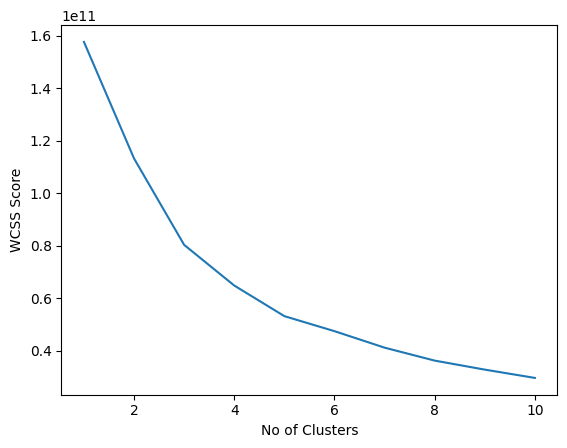

In [169]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')

In [170]:
km=KMeans(n_clusters=5,n_init=10,init='k-means++')

In [171]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [172]:
cluster_labels=km.predict(x)

In [173]:
cluster_labels

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 3, 0, 0, 1, 0, 3, 4, 0, 1, 0, 0, 1, 1, 0, 0, 3, 4, 0, 0, 3, 3,
       1, 3, 3, 2, 1, 3, 1, 1, 4, 3, 0, 1, 3, 3, 0, 1, 1, 2, 1, 3, 1, 3,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 3, 1, 1, 1, 3, 1, 0, 1, 2, 2, 4,
       1, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 1, 3, 3, 1, 4, 0, 0, 1, 3, 1, 3,
       1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 4, 4, 0, 0, 1, 4, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 4, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 3, 3, 0, 1, 3, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1,
       4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 3, 0, 0, 1, 3, 1, 0, 0, 1,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 3, 0, 3, 1, 1, 1, 3, 3, 0, 3, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 4, 0, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 3, 1, 0, 1, 0, 1, 1, 4, 4, 1, 1, 0, 1,
       3, 3, 3, 0, 3, 0, 1, 1, 1, 4, 1, 1, 0, 1, 1, 0, 1, 1, 4, 0, 4, 4,
       1, 0, 0, 4, 1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 0,

In [174]:
pd.Series(cluster_labels).value_counts()

1    227
0    113
3     71
4     24
2      5
dtype: int64

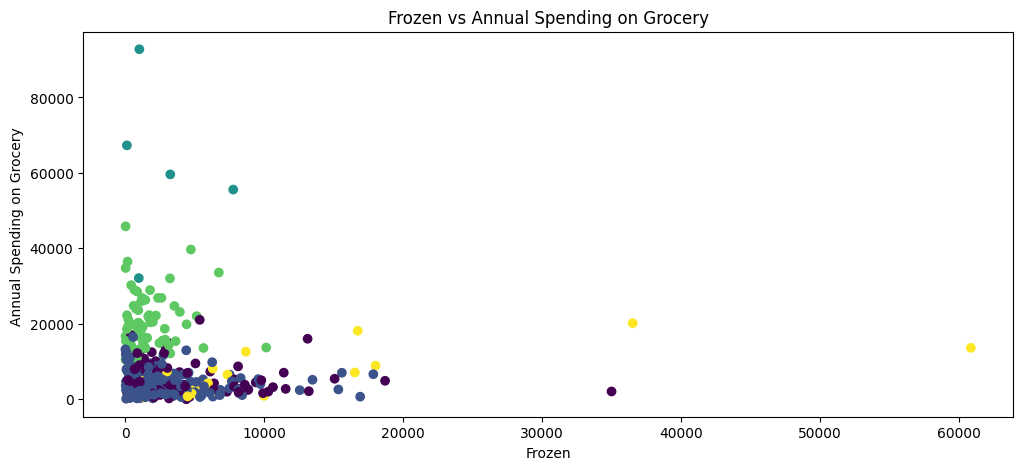

In [175]:
plt.figure(figsize=(12,5))
plt.scatter(x['Frozen'],x['Grocery'],c = cluster_labels)
plt.xlabel('Frozen')
plt.ylabel('Annual Spending on Grocery ')
plt.title('Frozen vs Annual Spending on Grocery')
plt.show()

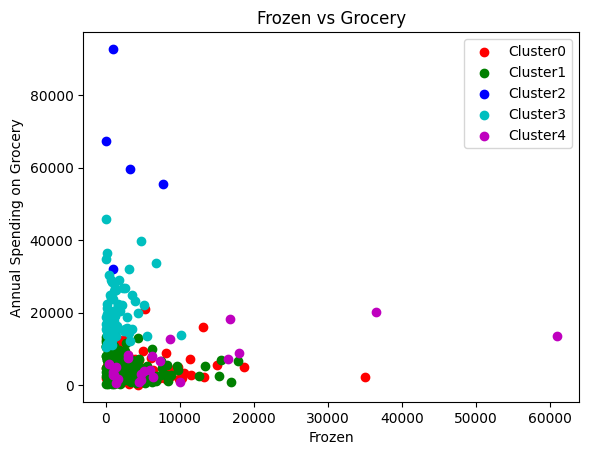

In [176]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Frozen'],
              cluster_data['Grocery'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Frozen')
plt.ylabel('Annual Spending on Grocery')
plt.title('Frozen vs Grocery')
plt.legend()

In [177]:
data['Cluster_labels']=cluster_labels

In [178]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


Silhouette Score K-Means Clustering 1

In [179]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(x,cluster_labels)

In [180]:
sil_score

0.3690214809099212

K-Means Clustering 2

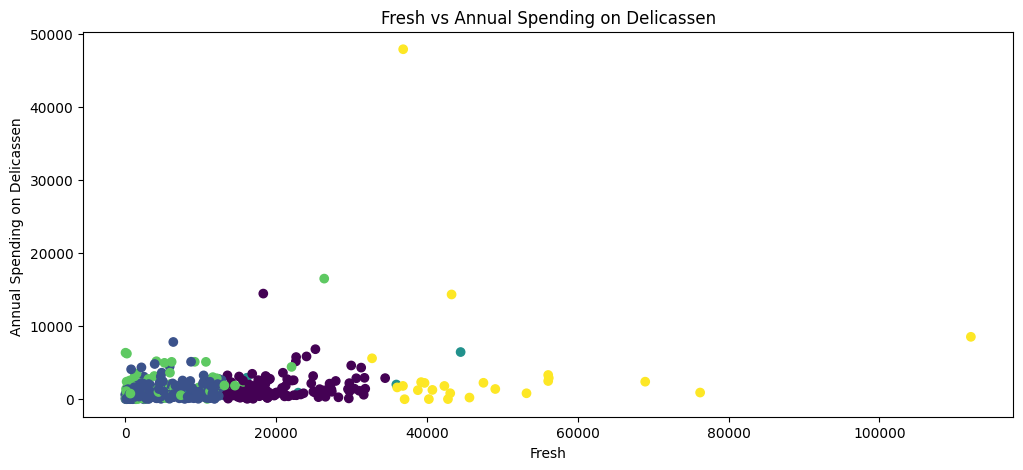

In [181]:
plt.figure(figsize=(12,5))
plt.scatter(x['Fresh'],x['Delicassen'],c = cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Annual Spending on Delicassen ')
plt.title('Fresh vs Annual Spending on Delicassen')
plt.show()

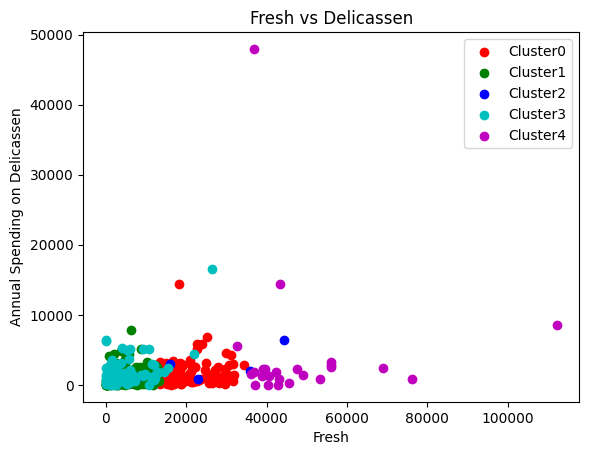

In [182]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Delicassen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Annual Spending on Delicassen')
plt.title('Fresh vs Delicassen')
plt.legend()

Agglomerative Hierarchical Clustering

In [185]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

Using method ward

In [186]:
mergings = linkage(x,method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [90.0, 90.0, 117.5, 117.5],
  [70.0, 70.0, 103.75, 103.75],
  [21.875, 21.875, 86.875, 86.875],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [212.5, 212.5, 240.0, 240.0],
  [190.0, 190.0, 226.25, 226.25],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [208.125, 208.125, 270.0, 270.0],
  [162.5, 162.5, 239.0625, 239.0625],
  [54.375, 54.375, 200.78125, 200.78125],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 355.0, 355.0],
  

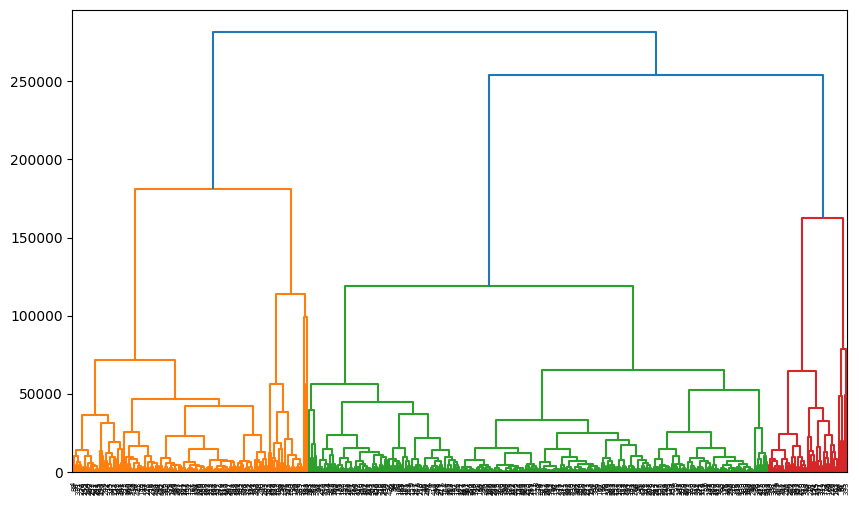

In [187]:
plt.figure(figsize=(10,6))
dendrogram(mergings)


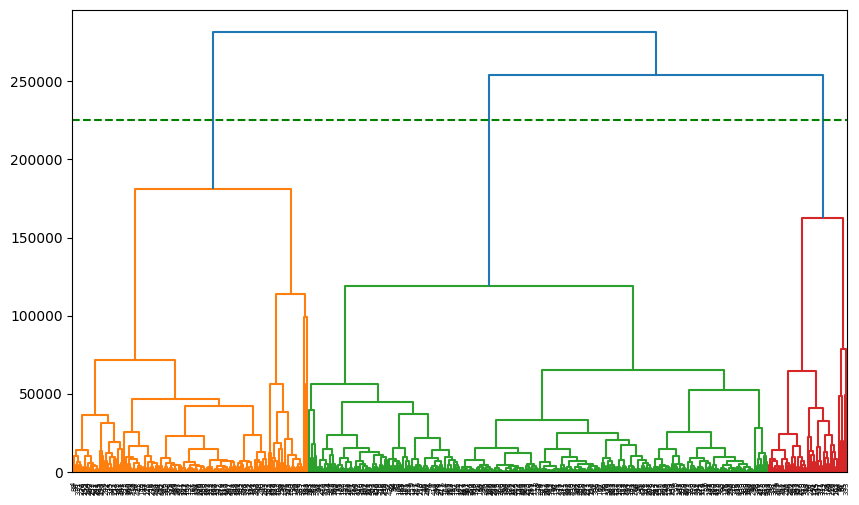

In [188]:
plt.figure(figsize=(10,6))
dendrogram(mergings)

plt.axhline(225000,color='green',linestyle='--')


In [189]:
cluster_labels_hc=fcluster(mergings,225000,criterion='distance')

In [190]:
cluster_labels_hc

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

Silhouette Score of Agglomerative Hierarchical Clustering-Ward Method

In [191]:
sil_score=silhouette_score(x,cluster_labels_hc)

In [192]:
sil_score

0.3750155190004844

Using method average

In [193]:
mergings = linkage(x,method='average')

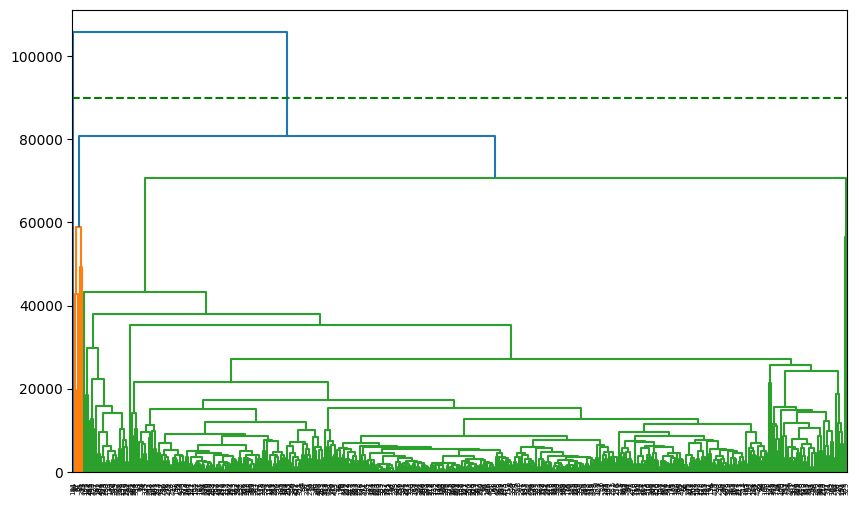

In [194]:
plt.figure(figsize=(10,6))
dendrogram(mergings)

plt.axhline(90000,color='green',linestyle='--')


In [195]:
cluster_labels_hc=fcluster(mergings,90000,criterion='distance')

Silhouette  Score of Agglomerative Cluster-Average Method

In [196]:
sil_score=silhouette_score(x,cluster_labels_hc)

In [197]:
sil_score

0.7957467756794632

Using method complete

In [198]:
mergings = linkage(x,method='complete')

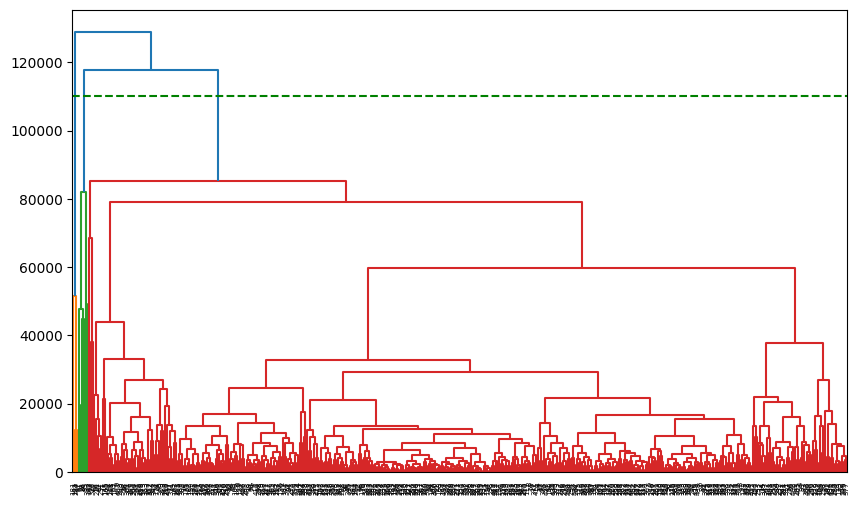

In [199]:
plt.figure(figsize=(10,6))
dendrogram(mergings)

plt.axhline(110000,color='green',linestyle='--')


In [200]:
cluster_labels_hc=fcluster(mergings,110000,criterion='distance')

Silhouette  Score of Agglomerative Cluster-Complete Method

In [201]:
sil_score=silhouette_score(x,cluster_labels_hc)

In [202]:
sil_score

0.7129985358672434

DBSCAN Clustering

In [203]:
k=3
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=k)
nn.fit(data)

NearestNeighbors(n_neighbors=3)

In [204]:
dist,ind=nn.kneighbors(data)
dist,ind

(array([[   0.        , 3142.89341213, 3300.21332644],
        [   0.        , 2612.97397614, 3499.19590763],
        [   0.        , 5542.84836524, 5842.2187566 ],
        ...,
        [   0.        , 4990.21071699, 7178.03517684],
        [   0.        , 1935.60998138, 1993.13045233],
        [   0.        , 1107.08762074, 1427.92681885]]),
 array([[  0, 281, 123],
        [  1, 244, 396],
        [  2, 166, 365],
        ...,
        [437,  77, 331],
        [438, 366, 199],
        [439, 362,  34]]))

In [205]:
dist=np.sort(dist,axis=0)[:,1]
dist

array([  278.91575789,   278.91575789,   344.88548824,   344.88548824,
         412.89465969,   412.89465969,   421.59696394,   421.59696394,
         437.59227598,   437.59227598,   488.5048618 ,   488.5048618 ,
         547.07677706,   586.81854095,   632.01028473,   632.01028473,
         643.00388801,   661.60940138,   661.60940138,   667.8001198 ,
         689.00507981,   689.00507981,   788.85740156,   791.91539952,
         791.91539952,   812.40507138,   812.40507138,   827.86895098,
         827.86895098,   879.57717115,   879.57717115,   897.28813655,
         928.33453022,   928.33453022,   968.19522825,   974.12473534,
         980.17753494,   980.17753494,   981.55947349,   981.55947349,
         998.49086125,   998.49086125,  1010.97774456,  1010.97774456,
        1018.15814096,  1038.66597133,  1044.52333626,  1044.52333626,
        1046.93122983,  1046.93122983,  1055.82337538,  1055.82337538,
        1065.28681584,  1076.4116313 ,  1076.4116313 ,  1078.33343637,
      

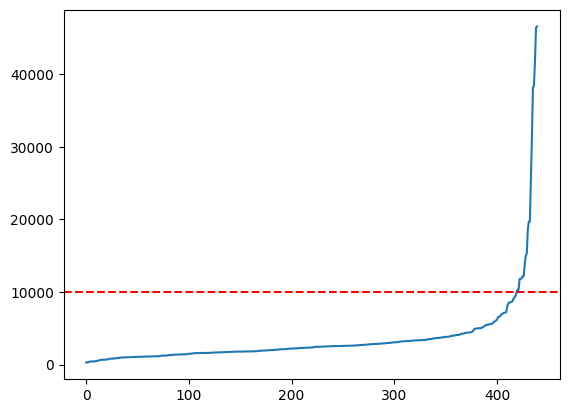

In [206]:
plt.plot(dist)
plt.axhline(y=10000,color='red',ls="--")

In [207]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10000,min_samples=k)
db.fit(data)

DBSCAN(eps=10000, min_samples=3)

In [208]:
import seaborn as sns

<Axes: xlabel='Fresh', ylabel='Delicassen'>

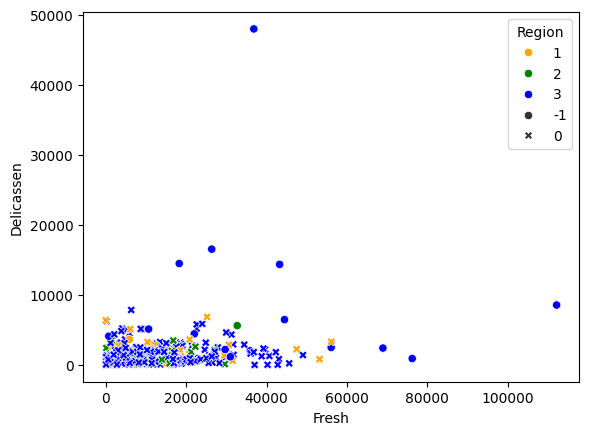

In [209]:
y=data['Region']
x=data.drop("Region",axis=1)
sns.scatterplot(x='Fresh',y='Delicassen',data=data,style=db.labels_,palette=['orange','green','blue'],hue=y)

Silhouette  Score of DBSCAN

In [210]:
sil_score=silhouette_score(x,db.labels_)

In [211]:
sil_score

0.6328794940590212

PCA

In [212]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Cluster_labels'],
      dtype='object')

In [213]:
x=[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'Cluster_labels']]

In [214]:
from sklearn.preprocessing import scale

In [215]:
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.04356873,
        -0.06633906, -0.2076102 ],
       [ 1.44865163,  0.59066829, -0.39130197, ...,  0.08640684,
         0.08915105, -0.2076102 ],
       [ 1.44865163,  0.59066829, -0.44702926, ...,  0.13323164,
         2.24329255, -0.2076102 ],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ...,  2.51121768,
         0.12145607,  1.51594614],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.56977032,
         0.21304614, -0.2076102 ],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.50488752,
        -0.52286938, -0.2076102 ]])

In [216]:
x=pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [217]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.207610
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.207610
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.207610
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-1.069388
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1.069388
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-1.069388
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,2.377724
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1.515946
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,-0.207610


In [218]:
from sklearn.decomposition import PCA

In [219]:
pc=PCA()

In [220]:
pc_array=pc.fit_transform(x)

In [221]:
pc_array

array([[ 0.71201044, -0.59080947, -0.78174898, ..., -1.00631289,
         0.63452603,  0.01619172],
       [ 0.91460121, -0.57902349, -0.69605065, ..., -0.92732735,
         0.49144908,  0.07591856],
       [ 1.13421002,  0.55511795, -0.71224166, ..., -1.0874447 ,
        -0.22251133, -0.2563155 ],
       ...,
       [ 4.13794574, -0.5819688 , -0.51647911, ...,  0.31247426,
        -0.56395474, -0.08736709],
       [-1.11072843, -0.019303  , -0.62412617, ...,  0.38280145,
        -0.14475723, -0.03654486],
       [-1.20218964, -0.84074407, -0.58533591, ...,  0.57044978,
         0.03770106,  0.01992562]])

In [222]:
pc_array=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [223]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.712010,-0.590809,-0.781749,0.112361,0.167751,-0.446529,-1.006313,0.634526,0.016192
1,0.914601,-0.579023,-0.696051,0.524898,-0.028026,-0.133247,-0.927327,0.491449,0.075919
2,1.134210,0.555118,-0.712242,1.643089,-0.604873,-1.209094,-1.087445,-0.222511,-0.256316
3,-1.338411,0.563365,-0.537364,0.553852,0.450142,0.478577,-0.030064,-0.336024,0.051111
4,0.272115,0.810225,-0.827521,0.782309,0.635059,-0.798278,-1.722094,-0.212043,-0.002289
...,...,...,...,...,...,...,...,...,...
435,-0.071053,2.332664,-0.419816,0.332636,1.467071,1.162629,0.030209,0.303746,0.855479
436,-0.355214,1.901917,-0.635613,-2.535801,-1.219115,-0.595987,0.261568,-0.170887,-0.217088
437,4.137946,-0.581969,-0.516479,-0.649648,0.243393,0.112138,0.312474,-0.563955,-0.087367
438,-1.110728,-0.019303,-0.624126,0.149564,-0.254407,-0.429081,0.382801,-0.144757,-0.036545


In [224]:
pc.explained_variance_

array([3.41191829, 1.80982999, 1.01465326, 0.79106863, 0.64063101,
       0.55779107, 0.45030593, 0.2813809 , 0.06292205])

In [225]:
pc.explained_variance_ratio_*100

array([37.82404372, 20.06351929, 11.2483026 ,  8.76967499,  7.1019448 ,
        6.18359291,  4.99202791,  3.11934888,  0.6975449 ])

In [226]:
pc1=PCA(n_components=8)

In [227]:
pc1_array=pc1.fit_transform(x)

In [228]:
pc1_array=pd.DataFrame(pc1_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

In [229]:
pc1_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,0.712010,-0.590809,-0.781749,0.112361,0.167751,-0.446529,-1.006313,0.634526
1,0.914601,-0.579023,-0.696051,0.524898,-0.028026,-0.133247,-0.927327,0.491449
2,1.134210,0.555118,-0.712242,1.643089,-0.604873,-1.209094,-1.087445,-0.222511
3,-1.338411,0.563365,-0.537364,0.553852,0.450142,0.478577,-0.030064,-0.336024
4,0.272115,0.810225,-0.827521,0.782309,0.635059,-0.798278,-1.722094,-0.212043
...,...,...,...,...,...,...,...,...
435,-0.071053,2.332664,-0.419816,0.332636,1.467071,1.162629,0.030209,0.303746
436,-0.355214,1.901917,-0.635613,-2.535801,-1.219115,-0.595987,0.261568,-0.170887
437,4.137946,-0.581969,-0.516479,-0.649648,0.243393,0.112138,0.312474,-0.563955
438,-1.110728,-0.019303,-0.624126,0.149564,-0.254407,-0.429081,0.382801,-0.144757


In [230]:
pc1.explained_variance_

array([3.41191829, 1.80982999, 1.01465326, 0.79106863, 0.64063101,
       0.55779107, 0.45030593, 0.2813809 ])

In [231]:
pc1.explained_variance_ratio_*100

array([37.82404372, 20.06351929, 11.2483026 ,  8.76967499,  7.1019448 ,
        6.18359291,  4.99202791,  3.11934888])

In [232]:
pc1_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
pc1,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
pc2,-0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
pc3,0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0
pc4,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0
pc5,0.0,-0.0,0.0,0.0,1.0,0.0,-0.0,-0.0
pc6,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,0.0
pc7,-0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,-0.0
pc8,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0


K-Means Clustering after PCA

In [233]:
from sklearn.cluster import KMeans

In [234]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10,init='k-means++')
  km.fit(pc1_array)
  css=km.inertia_
  wcss.append(css)

In [235]:
wcss

[3932.377221800067,
 2906.9557694561636,
 2468.240699376736,
 2103.32896648515,
 1823.404504314267,
 1521.499172943616,
 1301.7573864897963,
 1157.3956421597366,
 1058.4075564565103,
 975.3288755837359]

Text(0, 0.5, 'WCSS Score')

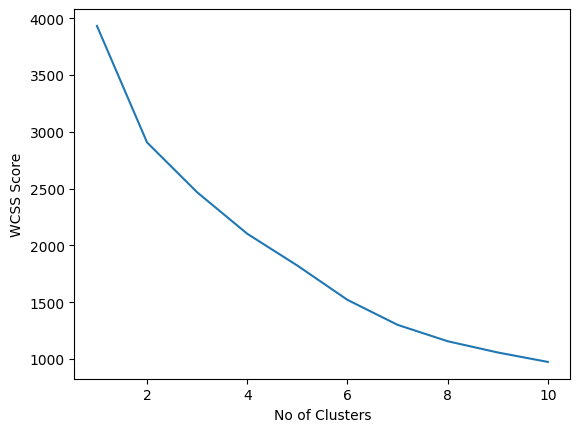

In [236]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')

In [237]:
km=KMeans(n_clusters=3,n_init=10,init='k-means++')

In [238]:
km.fit(pc1_array)

KMeans(n_clusters=3, n_init=10)

In [239]:
cluster_labels=km.predict(pc1_array)

In [240]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,

In [241]:
pd.Series(cluster_labels).value_counts()

0    341
2     75
1     24
dtype: int64

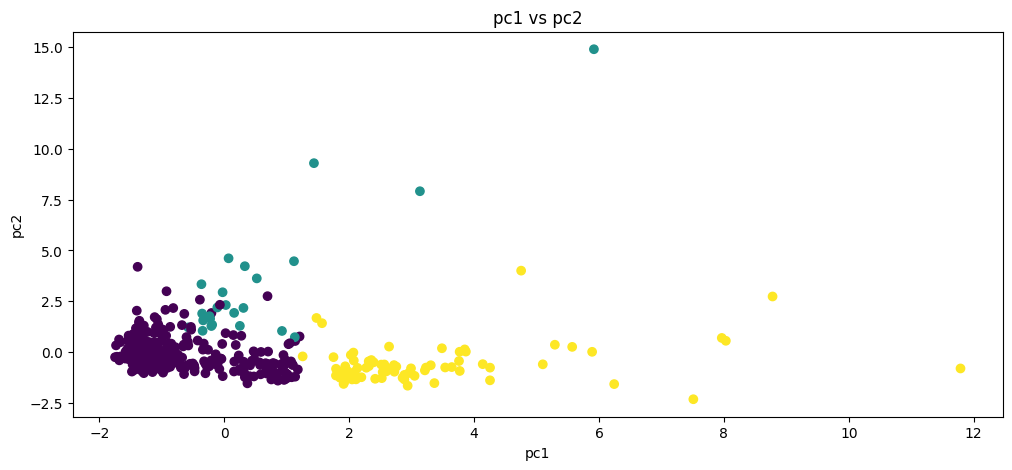

In [242]:
plt.figure(figsize=(12,5))
plt.scatter(pc1_array['pc1'],pc1_array['pc2'],c = cluster_labels)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pc1 vs pc2')
plt.show()

In [243]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(pc1_array,cluster_labels)

In [244]:
sil_score

0.4466147932000231

Agglomerative Hierarchical Clustering after PCA

In [245]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [246]:
mergings = linkage(pc1_array,method='ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [41.25, 41.25, 82.5, 82.5],
  [10.0, 10.0, 61.875, 61.875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [114.375, 114.375, 176.25, 176.25],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [270.0, 270.0, 310.0, 310.0],
  [245.0, 245.0, 290.0, 290.0],
  [220.0, 220.0, 267.5, 267.5],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0

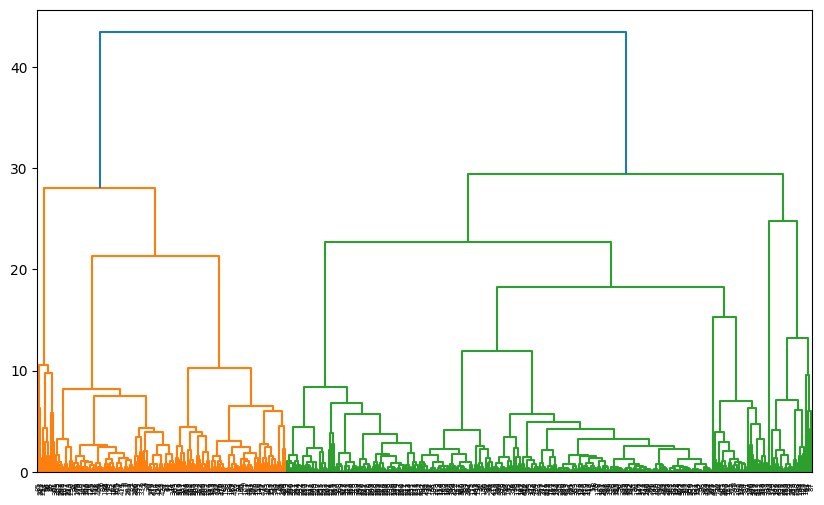

In [247]:
plt.figure(figsize=(10,6))
dendrogram(mergings)


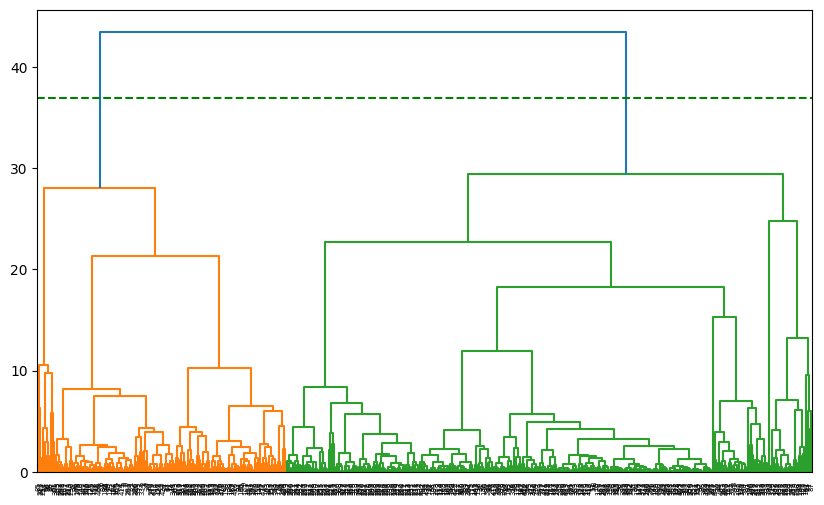

In [248]:
plt.figure(figsize=(10,6))
dendrogram(mergings)

plt.axhline(37,color='green',linestyle='--')


In [249]:
cluster_labels_hc=fcluster(mergings,37,criterion='distance')

In [250]:
cluster_labels_hc

array([1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,

In [251]:
sil_score=silhouette_score(pc1_array,cluster_labels_hc)

In [252]:
sil_score

0.3399485557001358